In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


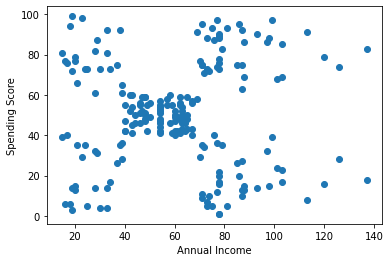

In [4]:
import matplotlib.pyplot as plt

x = data['Annual Income (k$)']
y = data['Spending Score (1-100)']
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.scatter(x,y)
plt.show()

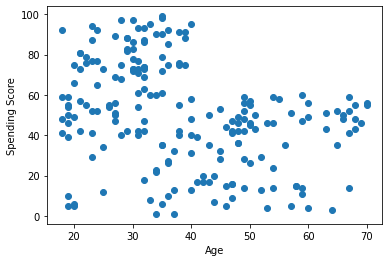

In [5]:
x1 = data['Age']
y1 = data['Spending Score (1-100)']
plt.xlabel('Age')
plt.ylabel('Spending Score')

plt.scatter(x1,y1)
plt.show()

In [6]:
data['Gender'] = data['Gender'].replace('Male',1)
data['Gender'] = data['Gender'].replace('Female',0)

In [7]:
x = data[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


<AxesSubplot:xlabel='Gender', ylabel='count'>

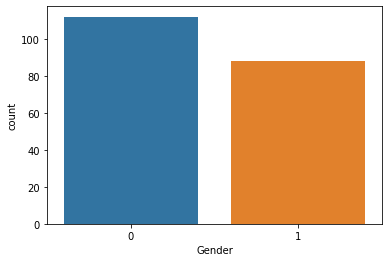

In [9]:
import seaborn as sns
sns.countplot(x = 'Gender' , data = x)

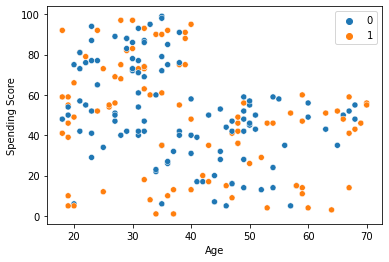

In [24]:
sns.scatterplot(x = "Age",y = "Spending Score (1-100)",hue = 'Gender', data = x)
plt.xlabel('Age')  
plt.ylabel('Spending Score')
plt.legend()
plt.show()

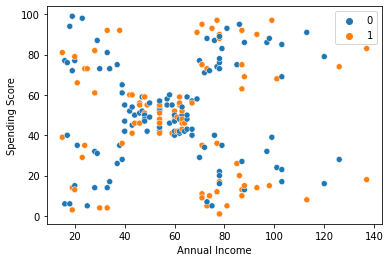

In [26]:
sns.scatterplot(x = "Annual Income (k$)",y = "Spending Score (1-100)",hue = 'Gender', data = x)
plt.xlabel('Annual Income')  
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [10]:
ssd = []
K = range(1,10)

from sklearn.cluster import KMeans

for k in K:
     model = KMeans(n_clusters = k)
     model.fit(x)
     inertia = model.inertia_
     ssd.append(inertia)
    

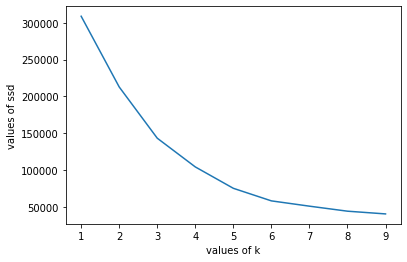

In [11]:
plt.plot(K,ssd)
plt.xlabel('values of k')
plt.ylabel('values of ssd')
plt.show()

In [12]:
# Accoding to elbow method , k= 5 would be better
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 5)
model.fit(x)


KMeans(n_clusters=5)

In [13]:
model.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

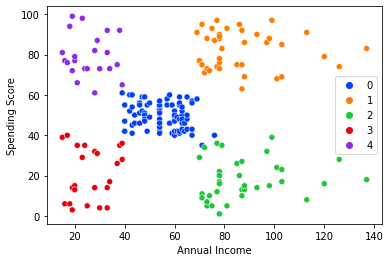

In [25]:
import seaborn as sns

colors = sns.color_palette('bright')[0:5]
sns.scatterplot(x = "Annual Income (k$)",y = "Spending Score (1-100)",hue = model.labels_,palette = colors, data = x)
plt.xlabel('Annual Income')  
plt.ylabel('Spending Score')
plt.legend()
plt.show()                

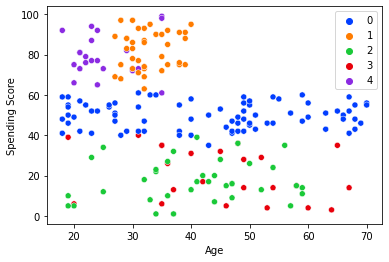

In [22]:
import seaborn as sns

sns.scatterplot(x = "Age",y = "Spending Score (1-100)",hue = model.labels_ , palette = colors, data = x)
plt.xlabel('Age')  
plt.ylabel('Spending Score')
plt.legend()
plt.show() 

## From the above graphs , we can analyze that:
 ### 1. The persons with an age of 25 to 40 and annual income greater than 70k i.e(cluster no. 1) have scores greater than 60.
 ### 2. The persons with an age of less than 25 and annual income less than 40k i.e(cluster no 4) also have spending score greater than 60.
### 3. The persons that have Spending score 0f 40-60(cluster 0) , having annual incone between 40-70k have age uniformally distributed over the entire range(18-70).
### 4. The persons having Age between 18 to 60 and Annual income greater than 70k (cluster 2) have scores less than 40.
### 5. The persons income less than 40k and age of between 30 to 70 have spending score less than 40.